# Workshop 3: Arrays and Plotting

## Numpy review with examples

Before we get into some exercises, here are some quick bits of code to remind you of various things you can do with arrays. Run these and play around with them to make sure you understand them. You'll also get some extra practice with exercises later on in this workshop.

In [1]:
import numpy as np

### Making arrays: a few tools

* array()
* zeros(), empty()
* hstack(), vstack(), column_stack()

There are also ways to make random arrays, reshape arrays, and many other things. You'll see hints of these as you go in this workshop.

In [2]:
# Make a basic array
np.array([1,2,3])

array([1, 2, 3])

In [3]:
# These will always be full of zeros
print np.zeros(5)
print np.zeros([3,4])

[ 0.  0.  0.  0.  0.]
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


In [4]:
# You can do ones also
print np.ones([6])

[ 1.  1.  1.  1.  1.  1.]


In [5]:
# or change the datatype
print np.zeros([2,2], dtype='bool')
print np.ones([2,2], dtype='bool')

[[False False]
 [False False]]
[[ True  True]
 [ True  True]]


In [6]:
# These might or might not be full of zeros ... you never know!
print np.empty(20)
print np.empty([3,4])

[  0.00000000e+000   0.00000000e+000   2.23010956e-314   2.17150609e-314
   2.22981344e-314   2.17104362e-314   2.13946251e-314   2.12332070e-314
   2.12332075e-314   2.12332080e-314   2.12332084e-314   2.14971742e-314
  -8.50080538e-128  -2.50979401e-263   1.68717413e-091   1.11253905e-308
   0.00000000e+000   0.00000000e+000   2.15026273e-314   1.39067116e-308]
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


In [7]:
# Put arrays together
evens = np.array([0,2,4,6,8])
odds  = np.array([1,3,5,7,9])

print 'hstack\n', np.hstack([evens, odds])
print 'vstack\n', np.vstack([evens, odds])
print 'column_stack\n', np.column_stack([evens, odds])

hstack
[0 2 4 6 8 1 3 5 7 9]
vstack
[[0 2 4 6 8]
 [1 3 5 7 9]]
column_stack
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


### Array indexing

Once you have an array, you can access and select its elements in various ways.

* basic indexing
* slicing and striding
* multidimensional indexing
* indexing with arrays
* argsort()
* boolean indexing

In [ ]:
# Some basics 
a = np.array([-1, 7, 8, 100, -20.2])
b = np.array(range(20))
print a[0]      # indexing
print a[-1]
print a[:3]     # slicing
print b[5:10]
print b[::2]    # striding
print b[4:15:3]

In [ ]:
# Multidimensional arrays
a = np.array(range(25)).reshape([5,5])
print a, '\n'

print '5th row, 3rd col\n', a[4,2]
print '2nd col\n', a[:,1]
print '1st and 2nd rows\n', a[:2,:]
print 'every other column\n', a[:,::2]

In [ ]:
# Indexing with arrays/lists of indices
a = np.array(range(0,20,2))
print a, '\n'

indices_to_pick = [1,2,8,7,6]
print a[np.array(indices_to_pick)] # you can use arrays
print a[indices_to_pick]           # or lists

In [ ]:
# Indexing with arrays/lists works on multidimensional arrays too
multi_a = np.array(range(16)).reshape([4,4])
print multi_a, '\n'

rows_to_pick = [3,2,0]
print multi_a[rows_to_pick], '\n'

cols_to_pick = range(3)
print multi_a[rows_to_pick, cols_to_pick]
print multi_a[range(4), range(4)]

In [ ]:
# `np.argsort()` can be used to get a list of indices that would sort the array
a = np.random.random_integers(0,10,10)
print a, '\n'

print 'Index order that would sort the array:', np.argsort(a)
print 'Sorted array:', a[np.argsort(a)]

In [ ]:
# Arrays can be indexed with boolean arrays (True/False values)
a = np.array(range(6))
print a, '\n'

bool_array = np.array([True, True, False, False, False, True])
print a[bool_array]

In [ ]:
# Boolean indexing is useful for filter arrays based on some criterion
a = np.array(range(20))
print a, '\n'

# pick even numbers
print a % 2 == 0
print a[a % 2 == 0], '\n'

# set odds to -1
a[a % 2 == 1] = -1
print a

### Meshgrid, and a brief intro to 2D plotting

Numpy's `meshgrid` can be used to quickly generate 2D arrays of $x$ and $y$ values, for instance for use in density and contour plots. Matplotlib's `imshow` plots 2D arrays with various colormaps, and can be useful for plotting or displaying images.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Generate the x and y values for a 2D grid
x, y = np.meshgrid(np.linspace(-1, 1, 100),
                   np.linspace(-2, 2, 100))

# Calculate the values that we want to plot at each point.
# This is a 2D array.
f = x + y

plt.imshow(f)   # Plot the 2D array
plt.viridis()   # Set the color scheme ("jet" is matplotlib's default)
plt.colorbar()  # Display a legend for the color values

How does this work? The plotting function `imshow` makes a 2D array graphical. The upper-left of the plot is the upper-left of the array, at row 0, column 0. The $x$ and $y$ axes are labeled with the row and column numbers, accordingly.

But since we're plotting $f(x,y) = x + y$, shouldn't the negative values be in the lower-left and the positive values in the upper-right? Right now, the origin is in the upper-left. Here's where we see a quirk of `imshow`. Take a look at the *2D* arrays `x` and `y` generated by `meshgrid`:

In [ ]:
print "x: notice the values change from left to right\n", x
print ""
print "y: notice the values change from top to bottom\n", y

Both arrays start with negative numbers at the upper-left, and move down and right towards positive numbers. However, we often want $y$ to move from negative values at the *bottom* to positive values at the *top*, since that's the conventional way to plot things. We can do this with the `origin="lower"` argument, which drops the graph's origin to the lower-left.

In [ ]:
# Move the origin to the lower-left
plt.imshow(f, origin="lower")
plt.colorbar()

Finally, we can change the axes labels from row and column numbers to whatever we want. In this case, it makes the most sense to use the same limits as we used in the meshgrid, since that's what we're plotting:

In [ ]:
# Customize the axes limit labels.
# imshow automatically adjusts the aspect ratio!
plt.imshow(f, origin="lower", extent=[-1, 1, -2, 2])
plt.colorbar()

### Meshgrid Memory Warning!

Remember that `meshgrid` computes *2D* arrays, so trying to do a 1000x1000 meshgrid requires 100x more memory than a 100x100 meshgrid. Start small, save often, and scale up slowly to make sure you don't fill up your RAM or crash your computer with a single overly-intensive plot. On `datahub.berkeley.edu` your virtual machine is limited to 1 GB of RAM. 

## Numpy Exercises (required)

**Exercise 1** Create an $8 \times 8$ array with a checkerboard pattern of zeros and ones using a slicing + striding approach.

**Exercise 2** Create a function `iplusj_array(n)` which uses `meshgrid` to create an $n \times n$ array with $(i,j)$-entry equal to $i+j$. Print the results for $n=1,$ $3,$ and $5$.

**Exercise 3** Create a random $5\times5$ array using the function `np.random.rand(5, 5)`. Use a combination of array slicing + argsort + indexing to sort the rows according to the second column, and print the result.

**Exercise 4** Use `np.random.rand(5,5)` to create a random 5x5 array. Use boolean indexing to set the nine entries in a 3x3 block in the bottom right corner to 0. Print the result.

(Hint: Use `np.ones()` or `np.zeros()` with the dtype argument to get a 5x5 array full of `True`'s or `False`'s. Use this array to build a boolean filter, in order to set only the entries you want equal to 0.)

## More Numpy Exercises (optional)

In [ ]:
import numpy as np

[Adapted from http://math.illinois.edu/~shahkar2/cbmg/] Try these exercises to practice making an manipulating arrays. You don't have to submit these.

1) Create a uniform subdivision of the interval $[-1.3, 2.5]$ with 64 subdivisions.

In [ ]:
# 1

# your code here

2) Generate an array of length  $3n \times 3n$  filled with the cyclic pattern 1, 2, 3.

In [ ]:
#2

# your code here

3) Write a function `odd_array(n)` which returns an array of the first $n$ odd integers. You may assume $n$ is a nonnegative integer.

In [ ]:
#3

# your code here

4) Create a $10 \times 10$ array of zeros and then "frame" it with a border of ones.

In [ ]:
#4

# your code here

5) Create a color plot of $f(x,y) = \sin(x)\sin(y)$ on the interval $[-\pi, \pi]\times[-\pi, \pi]$. Make sure the point $(-\pi, -\pi)$ is in the lower-left corner.

(Hint: add a colorbar with `plt.colorbar()` to see which colors correspond to which values. Is your plot of $\sin(x)\sin(y)$ equal to -1 or 1 where you expect it to be?)

In [ ]:
#5

# your code here

6) Evaluate $\cos$ and $\sin$ on the interval $[0,1]$ and then stack the results into a tall array with rows being the $(\cos(x),\sin(x))$ entries.

In [ ]:
#6

# your code here

7) Create a random $3\times5$ array using the `np.random.rand(3, 5)` function, then use `np.sum()` to compute: the sum of all the entries, the sum of the rows, and the sum of the columns.

(Hint: Type `np.sum?` to read about numpy's `sum` function, particularly the `axis` argument. Based on the examples it gives, what axis number sums over the rows? the columns?)

In [ ]:
#7

# your code here

8) Use `np.random.rand(100)` to create a random array of 100 numbers. Use boolean indexing to select only those entries that are 0.3 or less away from the mean. (Hint: You can use `np.mean()` to calculate the mean of an array.)

In [ ]:
#8

# your code here

## Plotting Review

### Documentation and Resources

Matplotlib can do many, many things, and there is usually more than one way to do the same thing. Fortunately, it is also very well documented, and where the documentation is lacking, Google and [StackOverflow](https://stackoverflow.com/questions/tagged/matplotlib?sort=frequent&pageSize=15) often fill in nicely. If you haven't already, check out the [Matplotlib Gallery](http://matplotlib.org/gallery.html) and the
[Beginner's Guide](http://matplotlib.org/users/beginner.html) to get an idea of the resources available to you. You might also want to check out [this basic tutorial](http://matplotlib.org/users/pyplot_tutorial.html), [this more varied tutorial](http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html), and [these examples](http://matplotlib.org/users/screenshots.html).

### Awesome tip

When using matplotlib in a file in Canopy, plots always show up in a new window where you can pan, zoom, and save your figure. Sometimes when using matplotlib, you will deliberately (or accidentally) generate a lot of figures, which appear in a lot of windows. It can be annoying to exit each window, one at a time. Fortunately, there's a way to close them all at once:
    
    plt.close('all')

The `close` function can also be used to close individual plots. Type `plt.close?` or `help(plt.close)` to read more.

### Using Matplotlib in IPython

When using matplotlib in an IPython Notebook you can do the same thing! But you may have also noticed that you can plot things inline in the notebook. To switch between these modes, use the following [IPython "magic" commands](https://ipython.org/ipython-doc/3/interactive/magics.html) (IPyhon magic commands always start with a `%`):
    
    %matplotlib qt      ## to make plots appear in a new window, using the qt backend. Would only 
    %matplotlib inline  ## to make plots appear in the notebook

Note! If you plot things inline, you can't edit the plots after they appear.

In [ ]:
import matplotlib.pyplot as plt

%matplotlib qt
plt.plot(range(10))
plt.title('TITLE')

In [ ]:
%matplotlib inline
plt.plot(range(0,-10,-1))
plt.title('TITLE')

### State-Machine vs Object-Oriented

Matplotlib can be used in two different ways: the state-machine approach, or the object-oriented approach. Most things can be done in either way, but some things are more difficult or impossible using a particular approach. Also, sometimes one way will lead to more understandable code than the other. It's good to be able to use both.

Here's a couple examples to remind you how these work, adapted from the [multiple_figs_demo](http://matplotlib.org/examples/pylab_examples/multiple_figs_demo.html) in the matplotlib gallery. These examples create exactly the same plots.

In [ ]:
# STATE-MACHINE approach
# Working with multiple figure windows and subplots
%matplotlib qt
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 2.0, 0.01)
s1 = np.sin(2*np.pi*t)
s2 = np.sin(4*np.pi*t)

plt.figure(1)
plt.subplot(211)    # 2 Rows, 1 Column; Plot #1
plt.plot(t, s1)
plt.subplot(212)    # 2 Rows, 1 Column; Plot #2
plt.plot(t, 2*s1)

plt.figure(2)

plt.plot(t, s2)

# now switch back to figure 1 and make some changes to the first subplot
plt.figure(1)
plt.subplot(211)    # 2 Rows, 1 Column; Plot #1
plt.plot(t, s2, 'gs')

plt.show()

In [ ]:
# OBJECT-ORIENTED approach
# Working with multiple figure windows and subplots
%matplotlib qt
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 2.0, 0.01)
s1 = np.sin(2*np.pi*t)
s2 = np.sin(4*np.pi*t)

fig1 = plt.figure()
fig2 = plt.figure()

ax1_1 = fig1.add_subplot(211)  # 2 Rows, 1 Column; Plot #1
ax1_2 = fig1.add_subplot(212)  # 2 Rows, 1 Column; Plot #2

ax2   = fig2.add_subplot(111)  # 1 Row,  1 Column; Plot #1

ax1_1.plot(t, s1)
ax1_2.plot(t, 2*s1)
ax2.plot(t, s2)

# now make some changes to the first subplot in figure 1
ax1_1.plot(t, s2, 'gs')

plt.show()

In the state-machine approach, we change which figure or subplot is active, and then tell matplotlib to do things with the currently active figure/subplot. In the object-oriented approach, we assign variables to each of the figures and subplots, and then have matplotlib do things on whichever one we want. The various `ax1_1`, `ax1_2`, and `ax2` in this example contain "axes objects" that we can plot on and work with.

Notice that we have a lot of flexibility in the *object-oriented* approach to reorganize the code in whatever way seems most readable. In the state-machine approach, you can also move your code around, but you may have to add new `figure` or `subplot` lines to make sure that the correct figure/subplot is currently active for what you want to do. Play around with the code above, or write some of your own, to see how things change!

Here's another way to do the object-oriented approach, using `plt.subplots` instead of `figure` and `add_subplot` to make it a bit more compact. Again, this does the exact same thing.

In [ ]:
# OBJECT-ORIENTED approach, version 2
# Working with multiple figure windows and subplots
%matplotlib qt
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 2.0, 0.01)
s1 = np.sin(2*np.pi*t)
s2 = np.sin(4*np.pi*t)

fig1, (ax1, ax2) = plt.subplots(2,1)  # 2 Rows, 1 Column
ax1.plot(t, s1)
ax2.plot(t, 2*s1)

fig2, ax3 = plt.subplots(1,1)         # 1 Row,  1 Column
ax3.plot(t, s2)

# now make some changes to the first subplot in figure 1
ax1.plot(t, s2, 'gs')

plt.show()

In these examples, you'll notice that the `plot` command is the same in both approaches.\* Some commands, however, are slightly different. For instance setting $x$ or $y$ labels ...

--------
\* *Technically, `plot` is used as a "function" in the state-machine approach, but as a "method" in the object-oriented approach. You don't need to worry about the technical differences between these for now.*

In [ ]:
# STATE-MACHINE approach
%matplotlib inline
plt.plot(range(10))
plt.title('TITLE')
plt.xlabel('X LABEL')
plt.ylabel('Y LABEL')

In [ ]:
# OBJECT-ORIENTED approach
%matplotlib inline
fig, ax = plt.subplots(1,1)
ax.plot(range(10))
ax.set_title('TITLE')
ax.set_xlabel('X LABEL')
ax.set_ylabel('Y LABEL')

For simple plots like these, you can see how the state-machine approach gives somewhat cleaner code.

## Kinematics Plot

[Adapted from Ayars, Problem 0-5] Create a single figure that shows separate graphs of vertical position, velocity, and acceleration for an object in free-fall, as in the sample plot below. Your plot should have a single horizontal time axis and separate stacked graphs showing position, velocity, and acceleration each on their own vertical axis. The online [matplotlib gallery](http://matplotlib.org/gallery.html) will probably be helpful! Make each curve a different color. (The example below uses magenta, cyan, and yellow.)

#### Hints

Look for "subplots_demo" or "shared_axis_demo" in the gallery.

Remember you can include a format string like `'b-'` in a plot command to get a blue line, etc.

You can get the superscript 2 in the last $y$-label by typing `$^2$` in the label string.

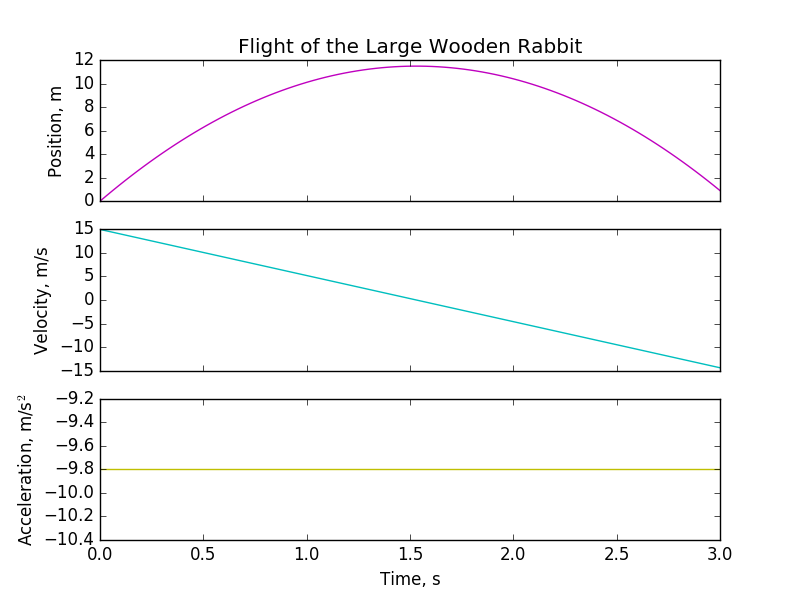

In [1]:
# Don't rerun this snippet of code.
# If you accidentally do, close and reopen the notebook (without saving)
# to get the image back. If all else fails, redownload the notebook.

# from IPython.display import Image
# Image(filename="samplecode/kinematics_plot.png")

## More Plotting Commands

Matplotlib has many plotting functions besides `plot`. Here's a quick sampler platter:

In [ ]:
# make sure our libraries are imported, and plot inline
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Semilog
x = np.linspace(1e-1,100,1000)
plt.semilogy(x, x**2)

In [ ]:
# Error Bars -- http://matplotlib.org/1.2.1/examples/pylab_examples/errorbar_demo.html
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)
yerr = 0.05 + 0.1*np.sqrt(x)
xerr = 0.05 + yerr

plt.errorbar(x, y, xerr=xerr, yerr=yerr)

In [ ]:
# Displaying images -- http://matplotlib.org/users/image_tutorial.html
import matplotlib.image as mpimg
img=mpimg.imread('http://24.media.tumblr.com/tumblr_mcs8fz4k321r0uk07o3_500.png')
plt.imshow(img)

In [ ]:
# imshow can plot any 2D array ... you saw this earlier with meshgrid
#   if you have a file with a 2D array of numbers, use
#   array_2D = np.loadtxt(your_file.txt)
array_2D = np.random.rand(100,100)
plt.imshow(array_2D)  # show the new 2D array
plt.set_cmap('hot') # set colormap
plt.colorbar()

In [ ]:
# Scatter plot -- http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radiuses

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.viridis()    # set colormap
plt.colorbar()   # add a colorbar

In [ ]:
# Polar Plot (with polar axes) -- http://matplotlib.org/examples/pylab_examples/polar_demo.html
#   Note: there's a bug with polar axes in matplotlib, where they
#   cannot display negative r values.
theta = np.linspace(0, 10 * np.pi, 1000)
r = [th**2 for th in theta]
ax = plt.subplot(111, projection='polar')
ax.plot(theta, r)
ax.set_title("Galilean Spiral", va='bottom')

In [ ]:
# Contour Plot -- http://matplotlib.org/examples/pylab_examples/contour_demo.html
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x,y)
Z = np.exp(-(2*X**2 + Y**2/2))

ax = plt.subplot(111)
levels = np.arange(0,1.0,.03)
con = ax.contour(X, Y, Z, levels)
ax.set_aspect('equal')
plt.colorbar(con)

In [ ]:
# You can plot contour and imshow together ...
plt.inferno() # set the colormap
plt.contour(X, Y, Z)
plt.imshow(Z, extent=[-1,1,-1,1])
plt.colorbar()

### Colormaps

This was mentioned earlier in an exercise the workshop, but matplotlib has many colormaps that you can try. See [this page](http://matplotlib.org/examples/color/colormaps_reference.html) for a visual list of all colormaps. You can use any of them by inserting a `set_cmap` command after your `imshow`, `scatter`, or any plotting function that can use a colormap. For instance, `plt.set_cmap('jet')`. some colormaps, such as `jet`, `hot`, `gray`, and `viridis` (among others), have special commands to use them: you can type `plt.gray()` instead of `plt.set_cmap('gray')`. See [this doc](http://matplotlib.org/api/pyplot_summary.html?highlight=colormaps#matplotlib.pyplot.colormaps) or type `help(plt.colormaps)` for more detailed instructions on colormaps.

The current default colormap for matplotlib is `jet`, but this will be changing to `viridis` in the next version, because `viridis` is designed to be ["perceptually uniform" (video)](http://matplotlib.org/style_changes.html), whereas `jet` is not.

### Aside: What is `pylab`?

As you look at online documentation, or even some of the course textbooks for Physics 77, you'll notice pylab come up on occasion. What is it, and how does it differ from what we've been using? Here's a brief description from a StackOverflow answer:

> 1. [...] pylab is part of matplotlib (in matplotlib.pylab) and tries to give you a MatLab like environment. matplotlib has a number of dependencies, among them numpy which it imports under the common alias np. scipy is not a dependency of matplotlib.

> 2. If you run ipython --pylab an automatic import will put all symbols from matplotlib.pylab into global scope. Like you wrote numpy gets imported under the np alias. Symbols from matplotlib are available under the mpl alias.

from https://stackoverflow.com/questions/12987624/confusion-between-numpy-scipy-matplotlib-and-pylab

Note that using pylab is [not officially recommended](http://matplotlib.org/faq/usage_faq.html#matplotlib-pyplot-and-pylab-how-are-they-related). Better practice is to use

    import matplotlib.pyplot as plt
    import numpy as np
    
just as we've been doing.

### Plotting Exercises (required)

**Exercise 5** Create a plot of $x^2 sin(1/x^2)+x$ on the interval $[−1,1]$ using points spaced 0.1 apart. Use numpy's `arange` function (not `linspace`). Then adjust your code so the plotting points are 0.01 apart, and finally 0.001 apart. Notice how the curve changes. Have your code print a brief description of the visual difference between these plots. Submit the version with 0.001 spacing.

You don't need to label this plot.

**Exercise 6** Create a 2D plot of $sin(1/x^2) + y$ where $x$ and $y$ both range from -1 to 1. (Tip: You don't need more than 1000 points in the $x$ dimension, and you can get away with even fewer points in the $y$ dimension.) Be careful to check that the point $(x,y) = (-1, -1)$ is in the bottom left of the plot, where it should be.

You don't need to label this plot, but be sure to include a colorbar and make sure the axes properly show that the plot is from -1 to 1 in both dimensions.

You can use the colormap of your choice. If you want to experiment with different colormaps, see [this page](http://matplotlib.org/examples/color/colormaps_reference.html) for a visual list of colormaps. You can use any of them by inserting a `set_cmap` command after your `imshow`. For instance, `plt.set_cmap('jet')`. See [this doc](http://matplotlib.org/api/pyplot_summary.html?highlight=colormaps#matplotlib.pyplot.colormaps) or type `help(plt.colormaps)` for more detailed instructions on colormaps.

You code doesn't need to print anything for this exercise, but it should show your plot.

**Excercise 7** Create a semilogy plot of the relative difference of  $1/(1+x^2)$  and  $1/x^2$  on the interval $[5,25]$. (The relative difference of numbers $a$ and $b$ is given by $|1−a/b|$. It provides a better sense of error relative to the order of magnitudes of $a$ and $b$.)

**Excercise 8** Copy and paste the following numbers into a text file `mystery.txt` in your current directory (Run `%pwd` to see what directory you're in. It will probably be the same directory as this notebook).

    2 2 0 0 0 0 2 2
    2 0 5 5 5 5 0 2
    0 5 0 5 0 5 5 0
    0 5 0 5 0 5 5 0
    0 5 5 5 5 0 5 0
    0 5 0 0 0 5 5 0
    2 0 5 5 5 5 0 2
    2 2 0 0 0 0 2 2

Now write a program which loads the text file into a 2D array with `np.loadtxt` and displays it with `imshow`. Use the colormap `gnuplot` and add the argument `interpolation='none'` to your `imshow` so that it displays clear pixels rather than interpolating between them.

In [ ]:
%pwd

## Congratulations!

You've finished Workshop 3! We recommend you go start this week's homework now---it may be a bit longer than previous weeks.

## Just for fun: Animations with Matplotlib

It turns out matplotlib can do animations, too! Run the code below, then read over it and try to understand what it's doing. (There are some new functions and python syntax here.) You might find it helpful to read about [Conway's Game of Life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life) on Wikipedia, particularly the rules.

In [ ]:
### Conway's Game of Life
### Adapted from 
### http://www.labri.fr/perso/nrougier/teaching/numpy.100/
### http://math.illinois.edu/~shahkar2/cbmg/anim.py

%matplotlib qt 
               # If it insists on plotting inline despite this command,
               # try restarting your kernel in the notebook.
               # The animation won't work inline.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

N = 100

Z = np.random.randint(0,2,(N,N))

fig = plt.figure()
plt.xlim(0, N)
plt.ylim(0, N)
mesh = plt.pcolormesh(Z, cmap='bone')

def update(frame):
    # Count neighbours
    N = (Z[0:-2,0:-2] + Z[0:-2,1:-1] + Z[0:-2,2:] +
         Z[1:-1,0:-2]                + Z[1:-1,2:] +
         Z[2:  ,0:-2] + Z[2:  ,1:-1] + Z[2:  ,2:])

    # Apply rules
    birth = (N==3) & (Z[1:-1,1:-1]==0)
    survive = ((N==2) | (N==3)) & (Z[1:-1,1:-1]==1)
    Z[...] = 0
    Z[1:-1,1:-1][birth | survive] = 1
    
    # Update mesh
    mesh.set_array(Z.ravel())
    return mesh

anim = animation.FuncAnimation(fig, update, interval=100)

plt.show()